In [32]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt

# Superstore Sales Analysis

This project analyzes a real-world Superstore dataset using Python. It explores sales, profit, shipping, discount trends, and applies machine learning (Random Forest) to predict profitability. Additionally, it includes a time series forecast (ARIMA) to predict future monthly sales, helping businesses make better decisions.


- **pandas** – for data cleaning and manipulation  
- **seaborn** – for beautiful and informative visualizations  
- **scikit-learn (sklearn)** – to train and evaluate a Random Forest model  
- **statsmodels (ARIMA)** – for time series forecasting  


In [34]:
# Load the dataset
df= pd.read_excel(r"C:\Users\HP\OneDrive\Documents\Superstore Dataset.xlsx")

In [35]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Shipping Days,Yearly,Days,Monthly,Ship Mode,Customer ID,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Highest discount Flag,Indicator,Profit Margin
0,1,CA-2018-152156,2018-11-08,2018-11-11,3,2018,Thursday,November,Second Class,CG-12520,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,OK,Profit,0.1600
1,2,CA-2018-152156,2018-11-08,2018-11-11,3,2018,Tuesday,November,Second Class,CG-12520,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,OK,Profit,0.3000
2,3,CA-2018-138688,2018-06-12,2018-06-16,4,2018,Wednesday,June,Second Class,DV-13045,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,OK,Profit,0.4700
3,4,US-2017-108966,2017-10-11,2017-10-18,7,2017,Wednesday,October,Standard Class,SO-20335,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,High,Loss,-0.4000
4,5,US-2017-108966,2017-10-11,2017-10-18,7,2017,Thursday,October,Standard Class,SO-20335,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,OK,Profit,0.1125


In [6]:
df.head(5)
df.isnull().sum()/100 # misiing figure find in % 
df.dtypes
df.shape
df.isnull().sum() / len(df) * 100
print(f'Number of duplicated data: {df.duplicated().sum()}')

Number of duplicated data: 0


In [38]:
df.isnull().sum()/100 # misiing figure find in % 

Row ID                    0.00
Order ID                  0.00
Order Date                0.00
Ship Date                 0.00
Shipping  Days            0.00
Yearly                    0.00
Days                      0.00
Monthly                   0.00
Ship Mode                 0.00
Customer ID               0.00
Customer Name             0.00
Segment                   0.00
Country/Region            0.00
City                      0.00
State                     0.00
Postal Code               0.11
Region                    0.00
Product ID                0.00
Category                  0.00
Sub-Category              0.00
Product Name              0.00
Sales                     0.00
Quantity                  0.00
Discount                  0.00
Profit                    0.00
Highest discount Flag     0.00
 Indicator                0.00
Profit Margin             0.00
dtype: float64

In [40]:
df.dtypes


Row ID                             int64
Order ID                          object
Order Date                datetime64[ns]
Ship Date                 datetime64[ns]
Shipping  Days                     int64
Yearly                             int64
Days                              object
Monthly                           object
Ship Mode                         object
Customer ID                       object
Customer Name                     object
Segment                           object
Country/Region                    object
City                              object
State                             object
Postal Code                      float64
Region                            object
Product ID                        object
Category                          object
Sub-Category                      object
Product Name                      object
Sales                            float64
Quantity                           int64
Discount                         float64
Profit          

In [42]:
df.shape

(9994, 28)

In [44]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Shipping  Days',
       'Yearly', 'Days ', 'Monthly ', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Highest discount Flag ', ' Indicator', 'Profit Margin '],
      dtype='object')

In [46]:
df=df.dropna()

In [48]:
print(f'Number of duplicated data: {df.duplicated().sum()}')

Number of duplicated data: 0


In [50]:
df.isnull().sum() / len(df) * 100

Row ID                    0.0
Order ID                  0.0
Order Date                0.0
Ship Date                 0.0
Shipping  Days            0.0
Yearly                    0.0
Days                      0.0
Monthly                   0.0
Ship Mode                 0.0
Customer ID               0.0
Customer Name             0.0
Segment                   0.0
Country/Region            0.0
City                      0.0
State                     0.0
Postal Code               0.0
Region                    0.0
Product ID                0.0
Category                  0.0
Sub-Category              0.0
Product Name              0.0
Sales                     0.0
Quantity                  0.0
Discount                  0.0
Profit                    0.0
Highest discount Flag     0.0
 Indicator                0.0
Profit Margin             0.0
dtype: float64

In [52]:
df.describe

<bound method NDFrame.describe of       Row ID        Order ID Order Date  Ship Date  Shipping  Days  Yearly  \
0          1  CA-2018-152156 2018-11-08 2018-11-11               3    2018   
1          2  CA-2018-152156 2018-11-08 2018-11-11               3    2018   
2          3  CA-2018-138688 2018-06-12 2018-06-16               4    2018   
3          4  US-2017-108966 2017-10-11 2017-10-18               7    2017   
4          5  US-2017-108966 2017-10-11 2017-10-18               7    2017   
...      ...             ...        ...        ...             ...     ...   
9989    9990  CA-2016-110422 2016-01-21 2016-01-23               2    2016   
9990    9991  CA-2019-121258 2019-02-26 2019-03-03               5    2019   
9991    9992  CA-2019-121258 2019-02-26 2019-03-03               5    2019   
9992    9993  CA-2019-121258 2019-02-26 2019-03-03               5    2019   
9993    9994  CA-2019-119914 2019-05-04 2019-05-09               5    2019   

          Days   Monthly     

In [54]:
# Profit vs Discount
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Discount", y="Profit", hue="Loss Flag")
plt.title("Profit vs Discount")
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Sales vs Profit
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Loss Flag")
plt.title("Sales vs Profit")
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Count of High Discount Losses
sns.countplot(data=df[df["Discount"] > 0.3], x="Loss Flag")
plt.title("High Discount Orders: Profit vs Loss")
plt.show()


ValueError: Could not interpret value `Loss Flag` for `hue`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

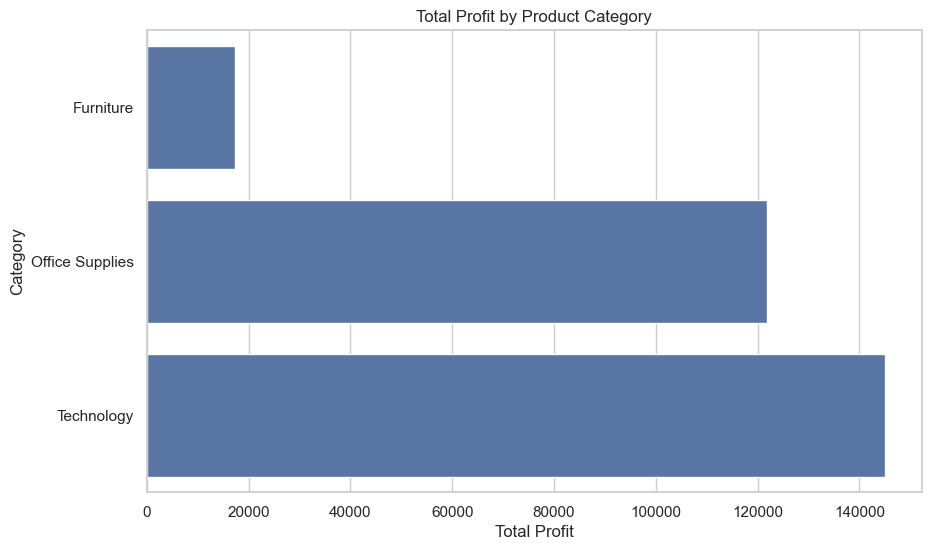

In [65]:
category_profit = df.groupby("Category")["Profit"].sum().sort_values()

sns.barplot(x=category_profit.values, y=category_profit.index)
plt.title("Total Profit by Product Category")
plt.xlabel("Total Profit")
plt.ylabel("Category")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_18408\916470568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Discount Level"] = df["Discount"].apply(


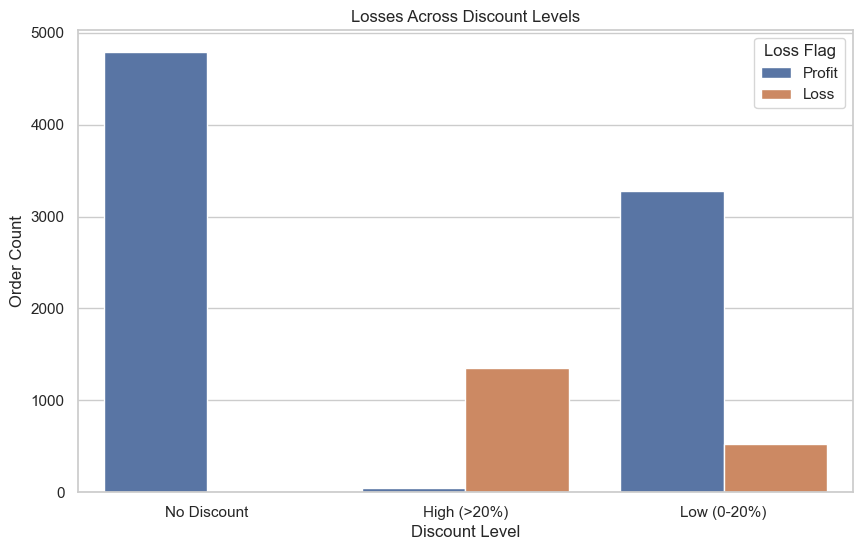

In [73]:
df["Discount Level"] = df["Discount"].apply(
    lambda x: "No Discount" if x == 0 else "Low (0-20%)" if x <= 0.2 else "High (>20%)"
)

sns.countplot(data=df, x="Discount Level", hue="Loss Flag")
plt.title("Losses Across Discount Levels")
plt.xlabel("Discount Level")
plt.ylabel("Order Count")
plt.show()


In [71]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Shipping  Days',
       'Yearly', 'Days ', 'Monthly ', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Highest discount Flag ', ' Indicator', 'Profit Margin ',
       'Profit Margin', 'Profit per Unit', 'Loss Flag', 'Discount Level',
       'Highest discount Flag'],
      dtype='object')

In [56]:
sns.boxplot(data=df, x="Loss Flag", y="Shipping  Days")
plt.title("Delivery Duration vs Profitability")
plt.show()


ValueError: Could not interpret value `Loss Flag` for `x`. An entry with this name does not appear in `data`.

In [99]:
monthly_profit = df.groupby("Order Month")["Profit"].sum().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])


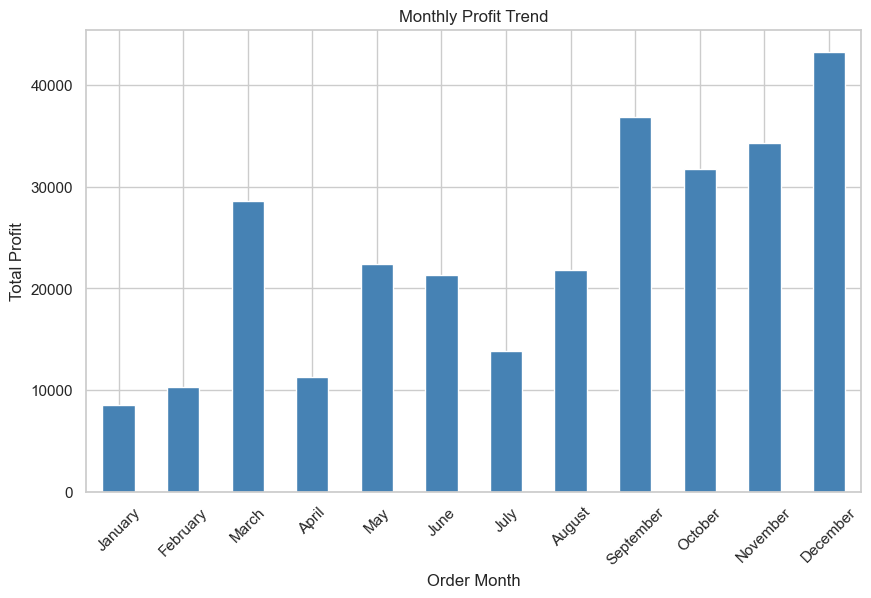

In [101]:
monthly_profit.plot(kind='bar', color='steelblue')
plt.title("Monthly Profit Trend")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'Sales Distribution')

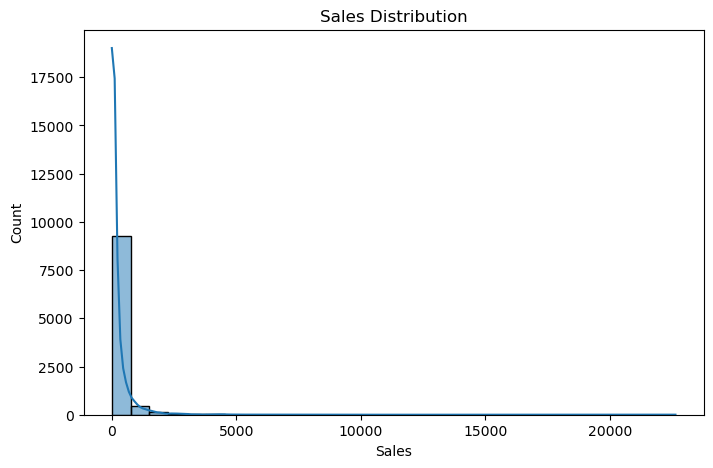

In [58]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')

<Axes: title={'center': 'Profit by Category'}, xlabel='Category'>

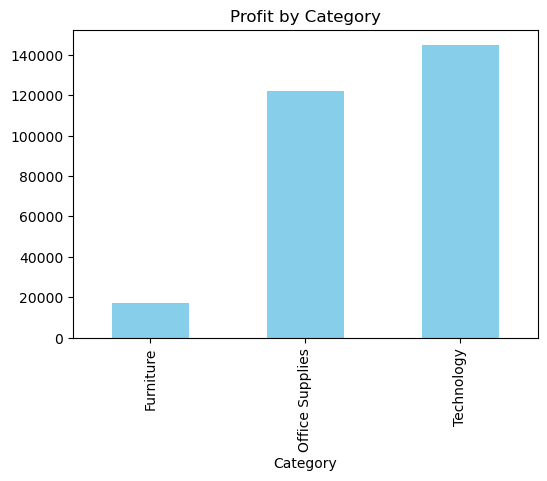

In [60]:
df.groupby('Category')['Profit'].sum().plot(kind='bar', color='skyblue', figsize=(6,4), title="Profit by Category")

<Axes: title={'center': 'Sales by Region'}, xlabel='Region'>

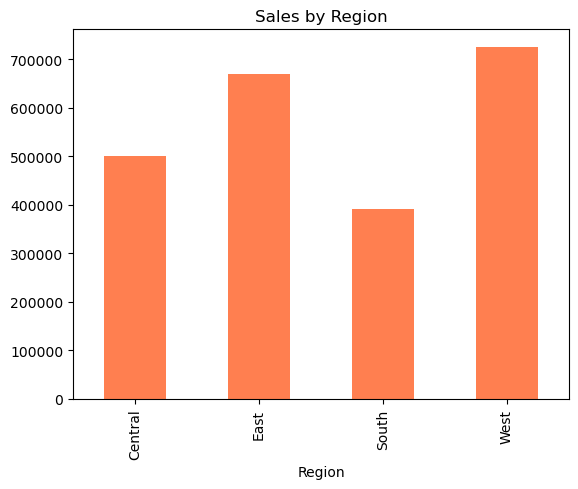

In [36]:
df.groupby('Region')['Sales'].sum().plot(kind='bar', color='coral', title='Sales by Region')


Text(0.5, 1.0, 'Correlation Matrix')

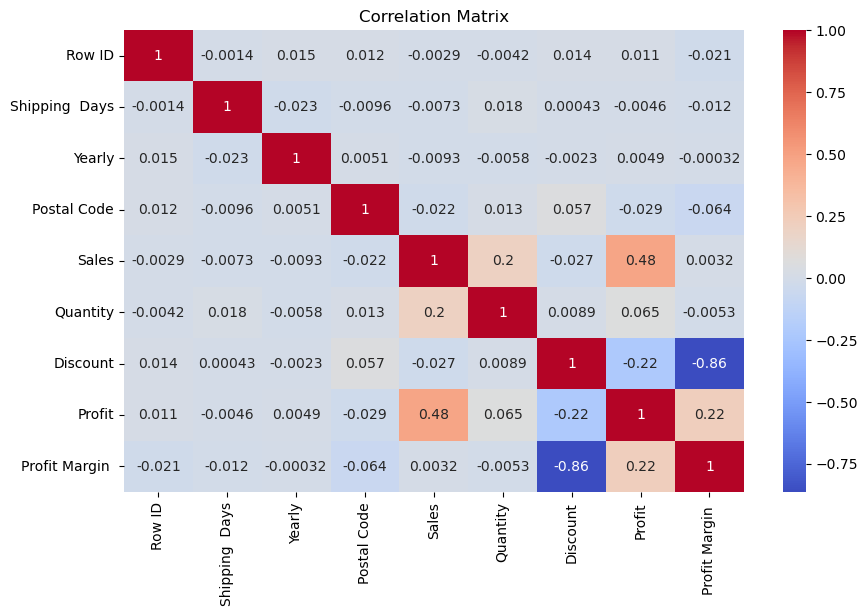

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")


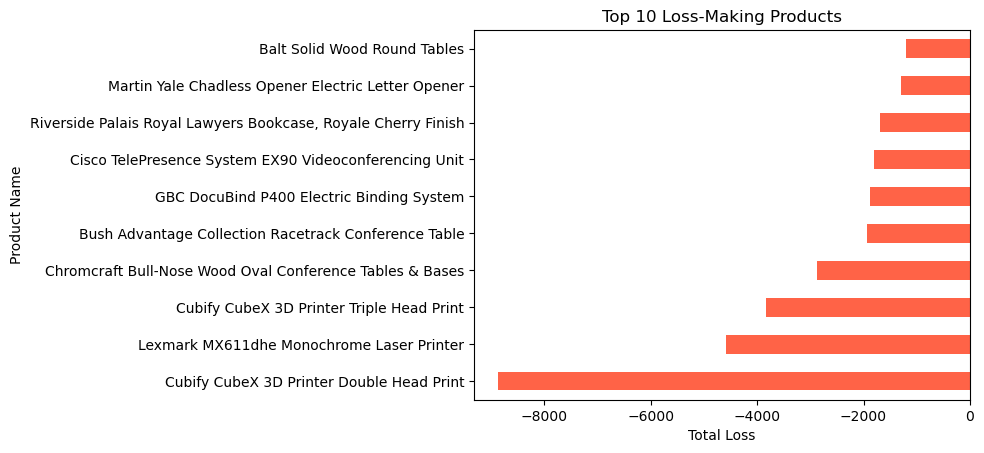

In [70]:
loss_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)
loss_products.plot(kind='barh', color='tomato', title='Top 10 Loss-Making Products')
plt.xlabel('Total Loss')
plt.show()


In [62]:
# Top 10 profitable products
df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

# Bottom 10 loss-making products
df.groupby('Product Name')['Profit'].sum().sort_values().head(10)


Product Name
Cubify CubeX 3D Printer Double Head Print                       -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                       -4589.9730
Cubify CubeX 3D Printer Triple Head Print                       -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases        -2876.1156
Bush Advantage Collection Racetrack Conference Table            -1934.3976
GBC DocuBind P400 Electric Binding System                       -1878.1662
Cisco TelePresence System EX90 Videoconferencing Unit           -1811.0784
Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish   -1682.6718
Martin Yale Chadless Opener Electric Letter Opener              -1299.1836
Balt Solid Wood Round Tables                                    -1201.0581
Name: Profit, dtype: float64

In [72]:
df['Profitable'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Select features and target
features = df[['Sales', 'Quantity', 'Discount']]
target = df['Profitable']

# Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.82      0.83       583
           1       0.96      0.96      0.96      2412

    accuracy                           0.93      2995
   macro avg       0.90      0.89      0.89      2995
weighted avg       0.93      0.93      0.93      2995



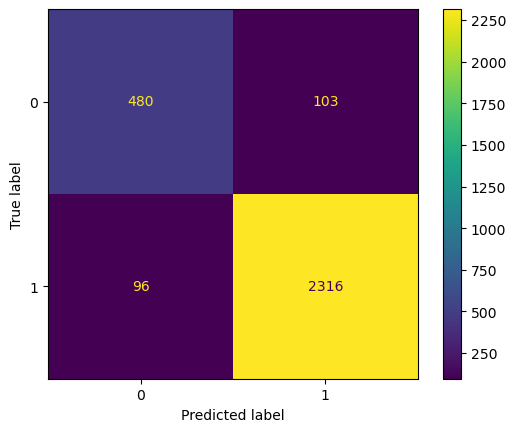

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [80]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly_sales, order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=6)
print(forecast)


C:\Users\HP\AppData\Local\Temp\ipykernel_4816\968380213.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


2020-01-31    75413.432636
2020-02-29    73619.430159
2020-03-31    73227.455823
2020-04-30    73141.812754
2020-05-31    73123.100469
2020-06-30    73119.011993
Freq: ME, Name: predicted_mean, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_4816\36450922.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(monthly_sales.index[-1] + pd.Timedelta(days=1), periods=6, freq='M')


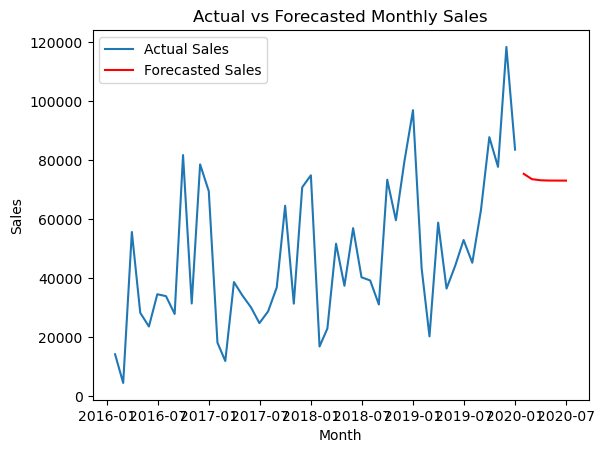

In [82]:
import matplotlib.pyplot as plt

plt.plot(monthly_sales, label='Actual Sales')
forecast_index = pd.date_range(monthly_sales.index[-1] + pd.Timedelta(days=1), periods=6, freq='M')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='red')
plt.legend()
plt.title("Actual vs Forecasted Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()
